24
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[    0.   677. 12102.  8043.  6821. 12190.  5220.  5589. 10255.  6265.
  4949.  6509.  4607.  6001.  6050.  5297.  2261.  6312. 12892. 13981.
 11800. 12926.   462.   842.]
[  677.     0. 12792.  9289.  8083. 11623.  5009.  5378.  9944.  6054.
  4738.  6298.  4396.  5790.  4507.  5086.  3137.  7331. 12639. 13585.
 10539. 13051.  1521.  1831.]
[12102. 12792.     0.  8121.  8050. 15579. 16116. 16410. 16726. 16817.
 15885. 16934. 15510. 16603. 16536. 16282. 13137.  6109. 14275. 13554.
 13076. 13127. 12005. 11683.]
[ 8043.  9289.  8121.     0.  1458. 12237.  9598.  9868. 10576. 10338.
  9186.  9502.  8944.  9420.  9237.  9631.  7521.  5246. 10804. 11580.
 18706.  9178.  8030.  7803.]
[ 6821.  8043.  8050.  1458.     0. 13264.  9022.  9321. 11342.  9818.
  8626.  9193.  8329.  9022.  8864.  9093.  6552.  5630. 12014. 12900.
 18554. 10472.  6794.  6538.]
[12190. 11623. 15579. 12237. 13264.     0.  8132.  7877.  2267.

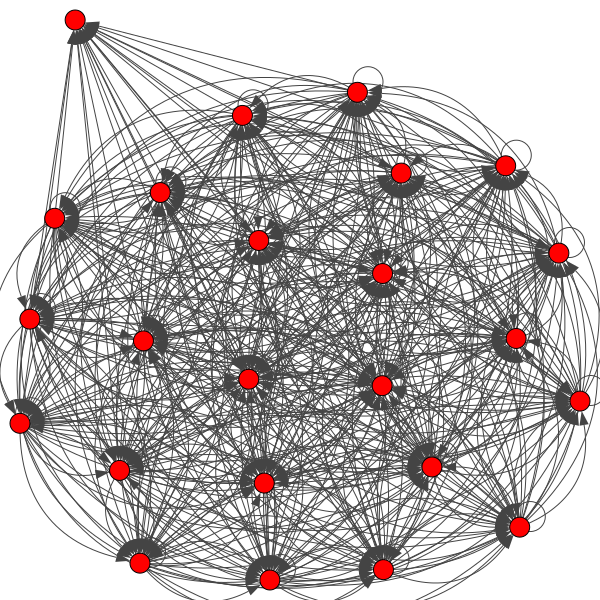

In [1]:
import numpy as np
import igraph as ig

class Grafo:
    def __init__(self, quantVertices):
        self.vertices = []
        self.quantVertices = quantVertices
        self.grafo = np.zeros((self.quantVertices, self.quantVertices))

    def addAresta(self, u, v, distancia):
        self.grafo[u, v] = distancia

    def addVertice(self, aeroporto):
        self.vertices.append(aeroporto)

    def mostraMatriz(self):
        for i in range(self.quantVertices):
            print(self.grafo[i])

    def to_igraph(self):
        g = ig.Graph(directed=True)
        for v in self.vertices:
            g.add_vertex(name=v)

        for i in range(self.quantVertices):
            for j in range(self.quantVertices):
                if self.grafo[i, j] != 0:
                    g.add_edge(i, j, weight=self.grafo[i, j])

        return g

f = open('arquivo.txt', 'r')
quantidadeAeroportos = int(f.readline())
print(quantidadeAeroportos)
g = Grafo(quantidadeAeroportos)
count = 0

while count < quantidadeAeroportos:
    aeroporto = f.readline().strip('\n')
    g.addVertice(aeroporto)
    count += 1

count = 0
while count < quantidadeAeroportos:
    linha = f.readline().strip('\n')
    if linha:
        dados = [int(x) for x in linha.split(' ')]
        count2 = 0
        while count2 < quantidadeAeroportos:
            aux = dados[count2]
            g.addAresta(count, count2, aux)
            count2 += 1
    count += 1


f.close()
g.mostraMatriz()

graph_igraph = g.to_igraph()

ig.plot(graph_igraph)
